## Описание проекта

Дан массив данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах.
Нужно выявить определяющие успешность игры закономерности. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats as st

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.style.use('dark_background')

import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

пропуски содержатся в столбцах:
    
    - Name (всего 2)
    - Year_of_Release (1.6%)
    - Critic_Score (51%)
    - User_Score (40%)
    - Rating (40%)

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
df['rating'].value_counts('mean', dropna=False)

NaN     0.404786
E       0.238708
T       0.177146
M       0.093509
E10+    0.084954
EC      0.000479
K-A     0.000179
RP      0.000179
AO      0.000060
Name: rating, dtype: float64

In [8]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

2424 значения 'tbd', скорее всего это обозначает 'to be determined'

In [9]:
df[df['user_score']== 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


какой-то закономерности в появлении значений 'tbd' не заметно

In [10]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

year_of_release имеет дробный тип данных, удалим пропуски и заменим тип данных на целочисленный

In [11]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
df = df.dropna(axis = 0, subset = ['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int, errors='ignore')
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [13]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [14]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [15]:
len(df['name'].unique())

11427

в столбце 'name' значения повторяются

In [16]:
df['name'].value_counts()

Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: name, Length: 11426, dtype: int64

In [17]:
df[df['name']=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,2.81
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,1.01
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN,0.27
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


ясно, одна и та же игра выходила на разных платформах

In [18]:
df.duplicated(subset=None, keep='first').value_counts()

False    16446
dtype: int64

явные дубликаты отсутствуют

Пропусков в названиях всего два, с ними я ничего делать не буду. Оценки и рейтинг нам сейчас не нужны, их я пока трогать не буду, чтобы не терять остальные данные

в user_score тип данных object, но это из-за значений tbd которые я пока не удаляю и не меняю

In [19]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
all_sales          float64
dtype: object

построим распределение выхода игр по годам, предварительно применим группировку

In [20]:
t = pd.DataFrame(df.groupby('year_of_release', as_index=False)['name'].agg('count'))
t

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


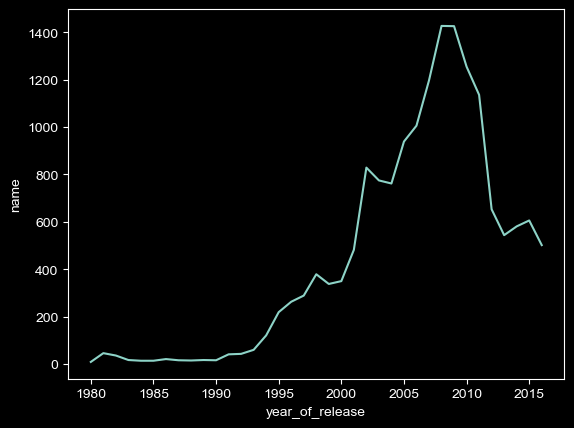

In [21]:
sns.lineplot(x=t['year_of_release'], y=t['name'])

sns.set(rc={'figure.figsize':(8,4)})

c 1994 начинается резкий рост выпуска игр, который продолжается до 2008 года, затем начинается падение 

In [22]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Выберем платформы с наибольшими суммарными продажами и построим распределение продаж по годам для каждой из них

In [23]:
df.groupby('platform')['all_sales'].agg('sum').sort_values(ascending=False).head(5)


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: all_sales, dtype: float64

In [24]:
t = df.query('platform == "PS2"').groupby('year_of_release')['all_sales'].agg(['sum']).reset_index()
t

,year_of_release,sum
0,2000,39.17
1,2001,166.43
2,2002,205.38
3,2003,184.31
4,2004,211.81
5,2005,160.66
6,2006,103.42
7,2007,75.99
8,2008,53.90
9,2009,26.40


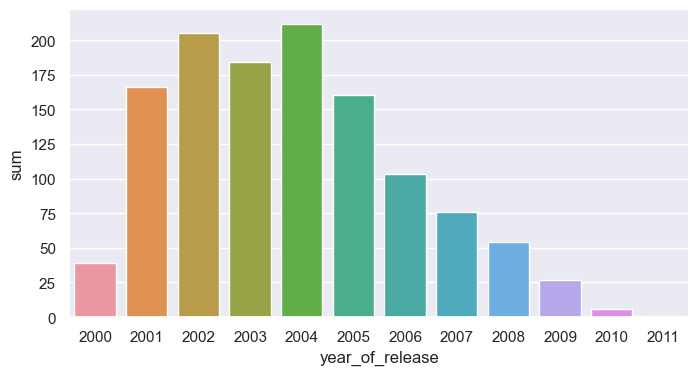

In [25]:
sns.barplot(data=t, x='year_of_release', y='sum');

цикл платформы PS2 составляет 11 лет 

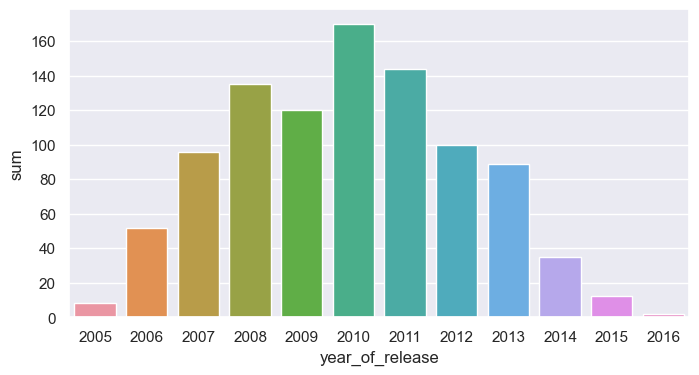

In [26]:
t = df.query('platform == "X360"').groupby('year_of_release')['all_sales'].agg(['sum']).reset_index()

sns.barplot(data=t, x='year_of_release', y='sum');

цикл также составляет 11 лет

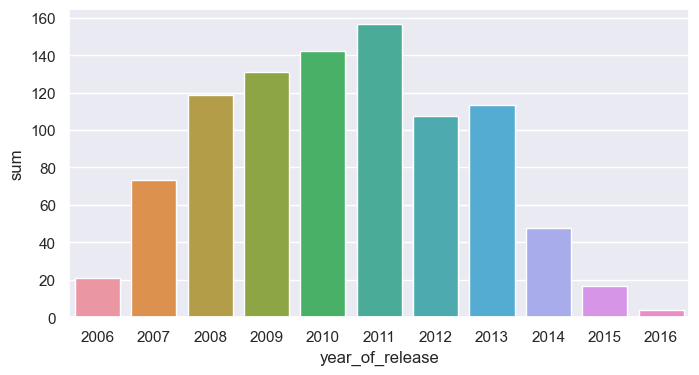

In [27]:
t = df.query('platform == "PS3"').groupby('year_of_release')['all_sales'].agg(['sum']).reset_index()

sns.barplot(data=t, x='year_of_release', y='sum');

цикл 11 лет

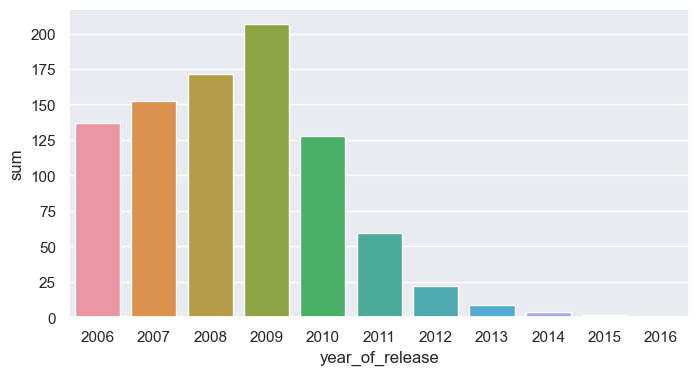

In [28]:
t = df.query('platform == "Wii"').groupby('year_of_release')['all_sales'].agg(['sum']).reset_index()

sns.barplot(data=t, x='year_of_release', y='sum');

цикл 7 лет

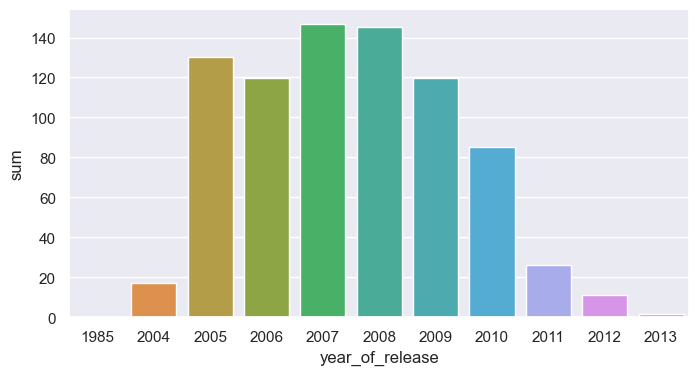

In [29]:
t = df.query('platform == "DS"').groupby('year_of_release')['all_sales'].agg(['sum']).reset_index()

sns.barplot(data=t, x='year_of_release', y='sum');

цикл 9 лет

цикл самых популярных платформ в среднем составляет 10 лет, за это время они появляются, выходят на пик продаж и исчезают

За актуальные данные примем данные за последние 3 года - с 2014 по 2016

In [30]:
df_act=df.query('year_of_release >= 2014 & year_of_release <= 2016')
df_act

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


узнаем, какие платформы лидируют по продажам, растут или падают, выберем несколько потенциально прибыльных платформ за актуальный период


In [31]:
top_platforms = df_act.groupby('platform')['all_sales'].agg('sum').sort_values(ascending=False).head(5)
top_platforms

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: all_sales, dtype: float64

ситуация изменилась:
    
PS4 теперь возглавляет рейтинг
    
построим распределение продаж по годам для лидирующих за актуальнй период платформ

PS4:

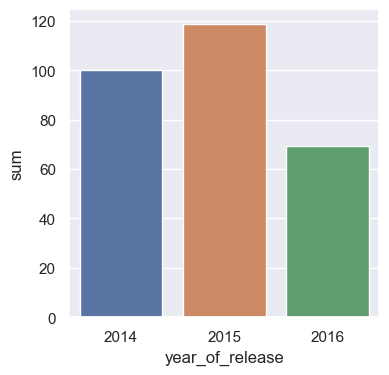

In [32]:
t = df_act.query('platform == "PS4"').groupby('year_of_release')['all_sales'].agg(['sum']).reset_index()
sns.set(rc={'figure.figsize':(4,4)})
sns.barplot(data=t, x='year_of_release', y='sum');

XOne:

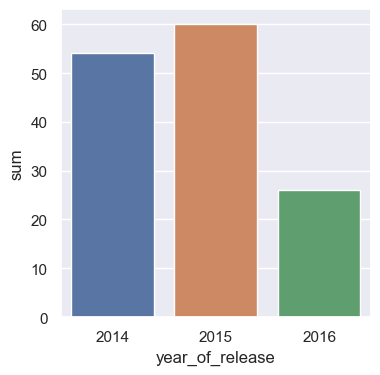

In [33]:
t = df_act.query('platform == "XOne"').groupby('year_of_release')['all_sales'].agg(['sum']).reset_index()

sns.barplot(data=t, x='year_of_release', y='sum');

для 3DS:

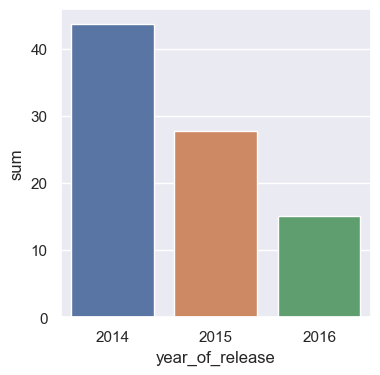

In [34]:
t = df_act.query('platform == "3DS"').groupby('year_of_release')['all_sales'].agg(['sum']).reset_index()

sns.barplot(data=t, x='year_of_release', y='sum');

PS3:

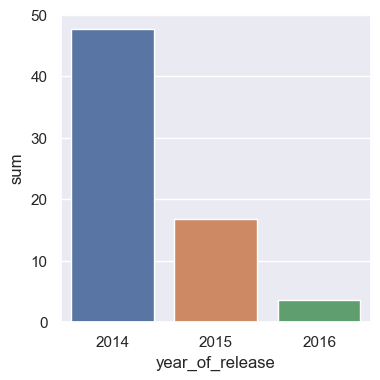

In [35]:
t = df_act.query('platform == "PS3"').groupby('year_of_release')['all_sales'].agg(['sum']).reset_index()

sns.barplot(data=t, x='year_of_release', y='sum');

X360:

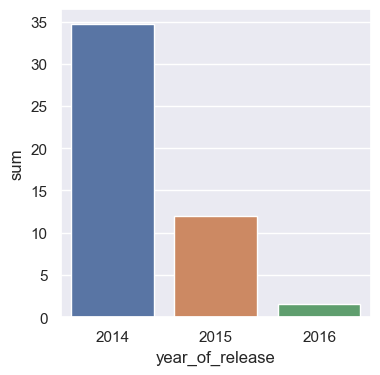

In [36]:
t = df_act.query('platform == "X360"').groupby('year_of_release')['all_sales'].agg(['sum']).reset_index()

sns.barplot(data=t, x='year_of_release', y='sum');

заметим, что только для 2-х платформ наблюдается рост продаж за последние годы, если не брать в рассчет неполные данные за 2016 год:
- PS4
- XOne

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

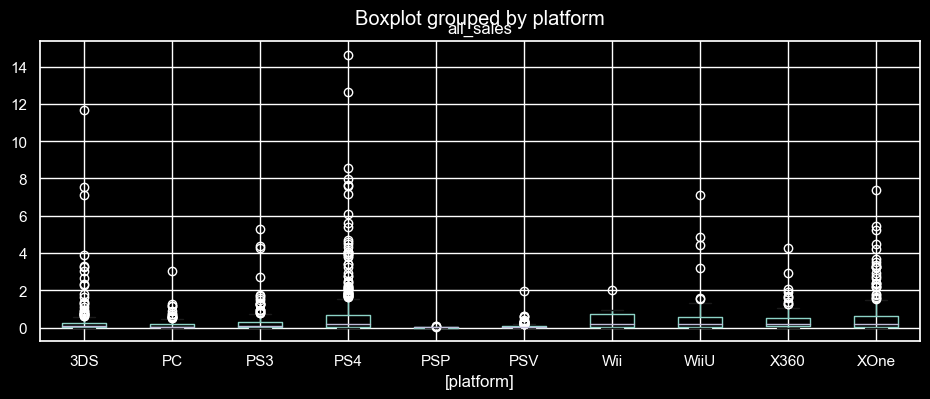

In [37]:
plt.style.use('dark_background')
df_act.boxplot(column=['all_sales'],by=['platform'],figsize = (11,4));

рассмотрим более детально

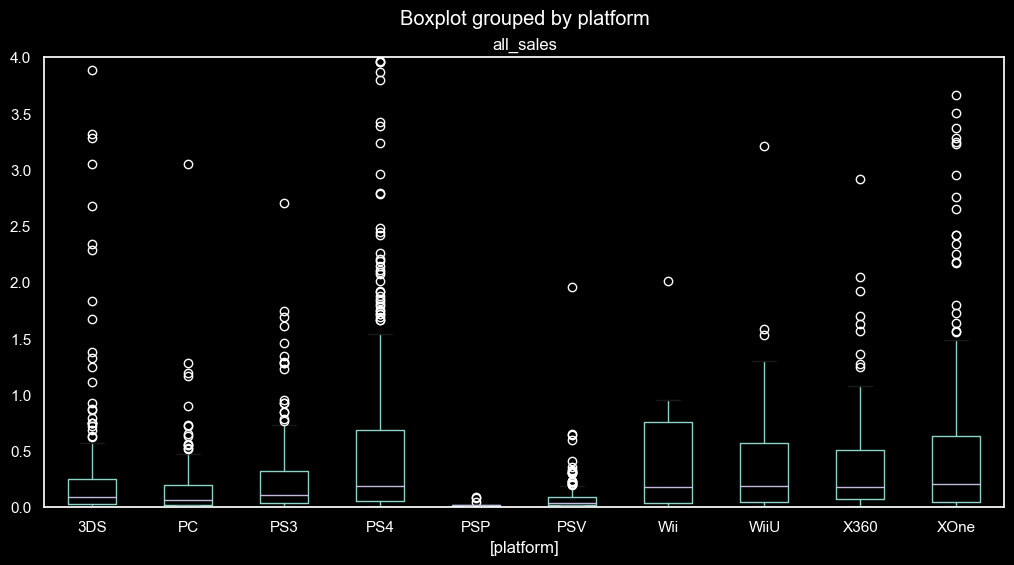

In [38]:
df_act.boxplot(column=['all_sales'],by=['platform'],figsize = (12,6), grid=False)

plt.ylim(0, 4);

графики показывают, что практически для всех платформ есть разбросы продаж по некоторым играм, достигающие десятков млн копий

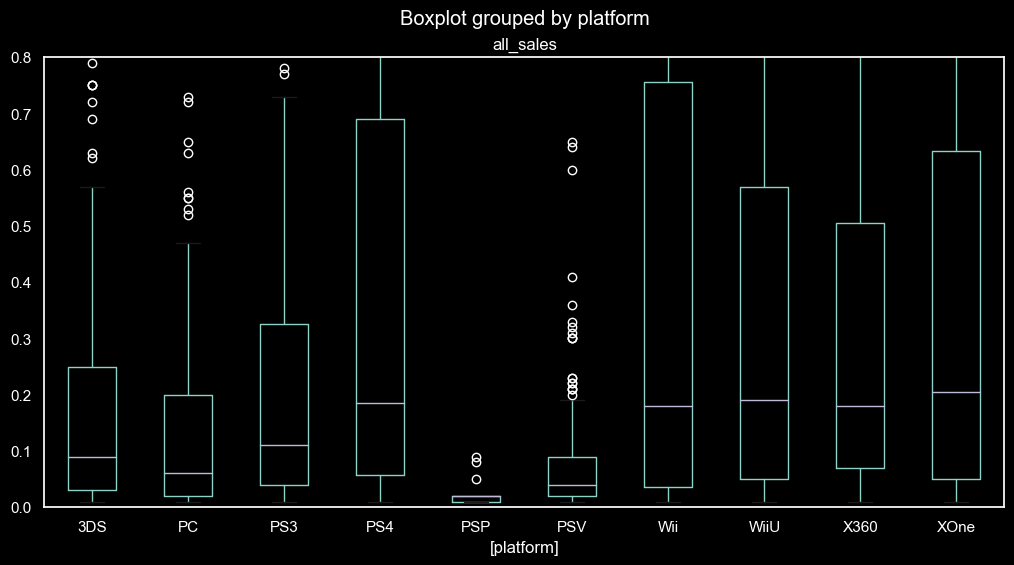

In [39]:
df_act.boxplot(column=['all_sales'],by=['platform'],figsize = (12,6), grid=False)

plt.ylim(0, 0.8);

медианное значение находятся в пределах 0.2 млн, а 3-й квартиль в пределах 0.8 млн

Посмотрим, как влияют отзывы пользователей и критиков на продажи внутри одной платформы на примере самой популярной (PS4).

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [40]:
PS4 = df_act.query('platform == "PS4"')
PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [41]:
PS4[['critic_score', 'all_sales']].corr()

,critic_score,all_sales
critic_score,1.000000,0.402661
all_sales,0.402661,1.000000


между отзывами критиков и продажами очень слабая корреляция

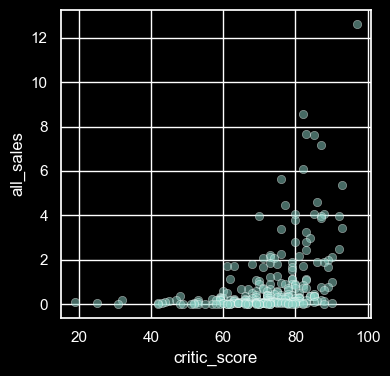

In [42]:
sns.scatterplot(data=PS4, x='critic_score', y='all_sales', alpha = 0.5);

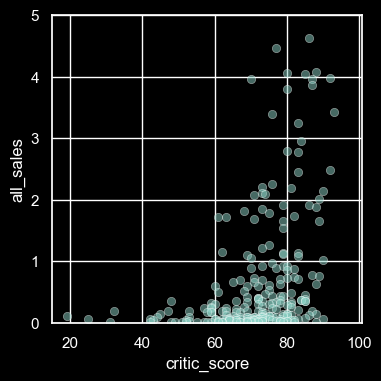

In [43]:
sns.scatterplot(data=PS4, x='critic_score', y='all_sales', alpha = 0.5)

plt.ylim(0, 5);

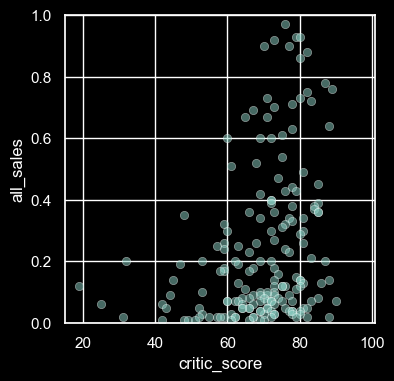

In [44]:
sns.scatterplot(data=PS4, x='critic_score', y='all_sales', alpha = 0.5)

plt.ylim(0, 1);

на диаграмме рассеяния видно, что есть тенденция роста продаж при увеличении оценки критиков

посмотрим корреляцию продаж и оценок юзеров, отбросив значения 'tbd' и изменив тип данных:

In [45]:
df_act_q = df_act[df_act['user_score'] != 'tbd']

df_act_q['user_score'] = df_act_q['user_score'].astype(float, errors='ignore')
df_act_q.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
all_sales          float64
dtype: object

In [46]:
PS4_q = df_act_q.query('platform == "PS4"')

In [47]:
PS4_q[['user_score', 'all_sales']].corr()

,user_score,all_sales
user_score,1.000000,-0.040132
all_sales,-0.040132,1.000000


между оценками юзеров и продажами корреляции нет

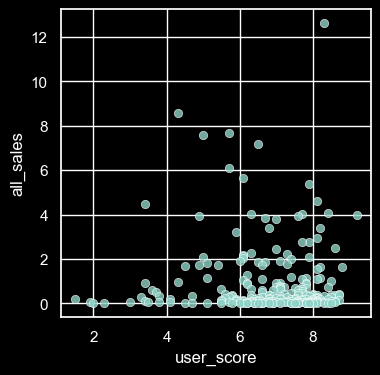

In [48]:
sns.scatterplot(data=PS4_q, x='user_score', y='all_sales', alpha = 0.8);

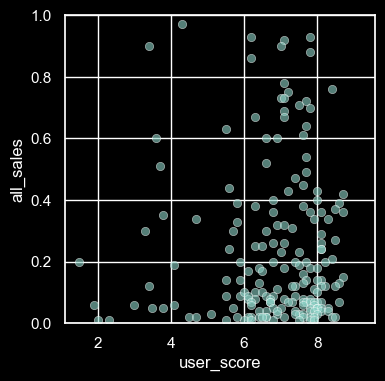

In [49]:
sns.scatterplot(data=PS4_q, x='user_score', y='all_sales', alpha = 0.6)

plt.ylim(0, 1);

высоких продаж больше для оценок 6-9

проведем сравнение с другими платформами:

In [50]:
platforms_unique = df_act['platform'].unique()
platforms_unique

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

PS4:


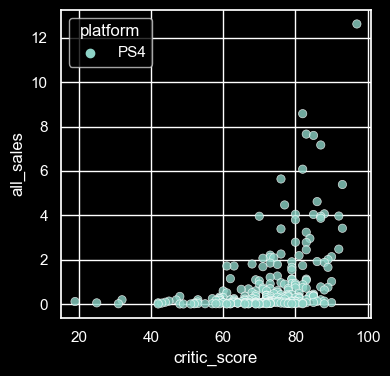

3DS:


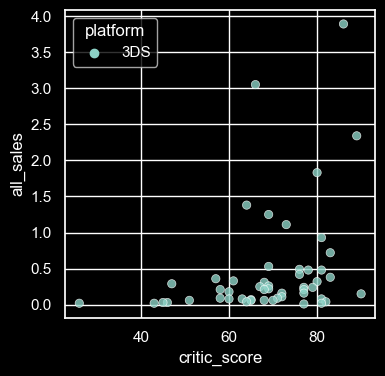

XOne:


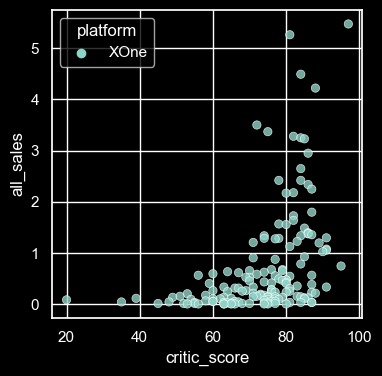

WiiU:


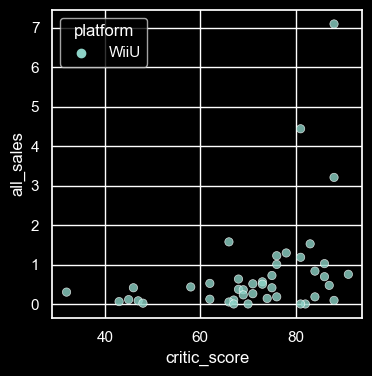

PS3:


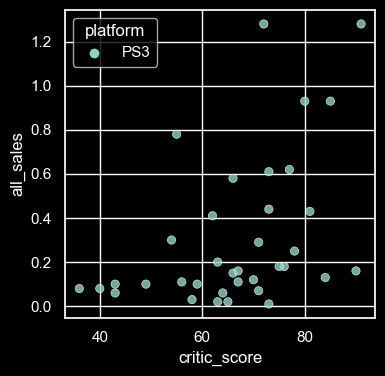

X360:


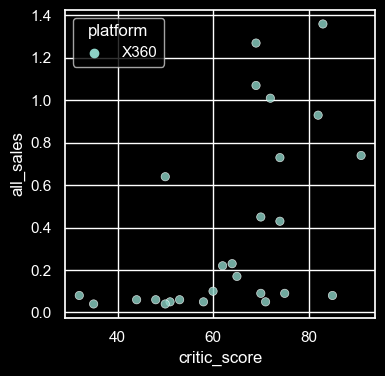

PC:


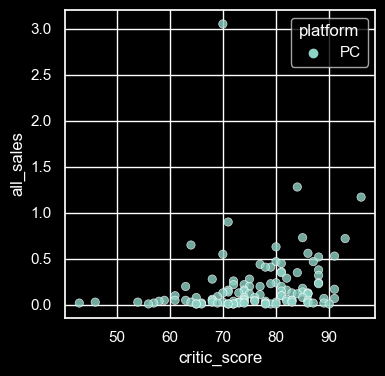

Wii:


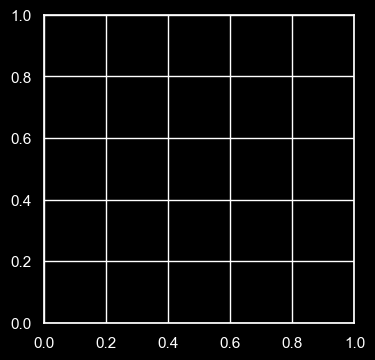

PSV:


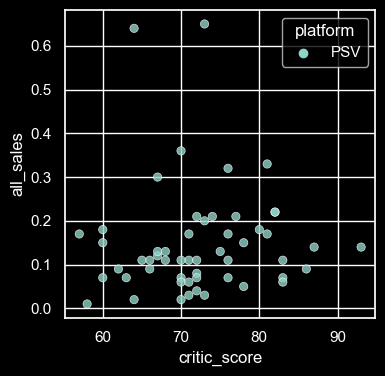

PSP:


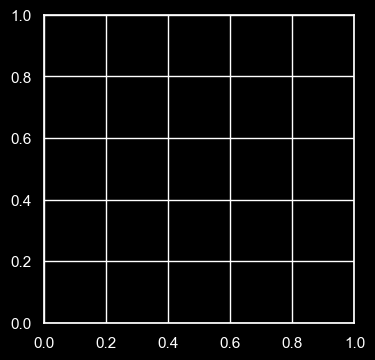

In [51]:
for name in platforms_unique:
    platform = df_act.query('platform == @name')
    print(name+':')
    sns.scatterplot(data=platform, x='critic_score', y='all_sales', alpha = 0.8, hue='platform')
    plt.show()    

по имеющимся данным для XOne и PC можно отметить рост продаж в зависимости от оценки критиков

PS4:


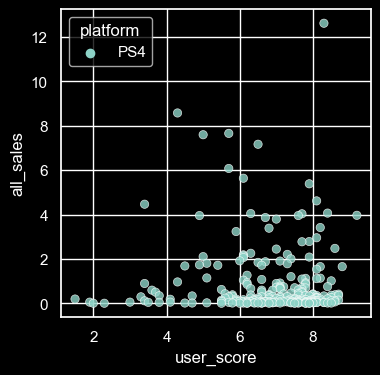

3DS:


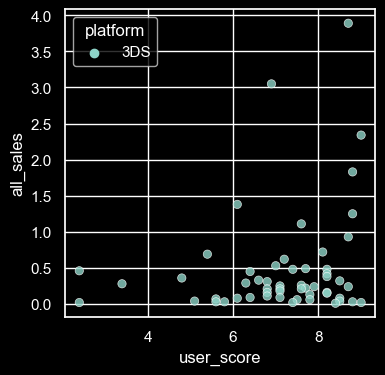

XOne:


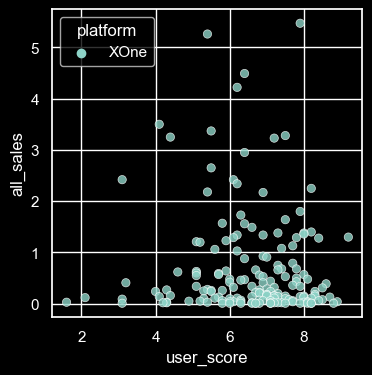

WiiU:


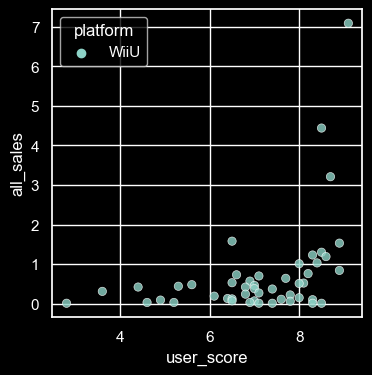

PS3:


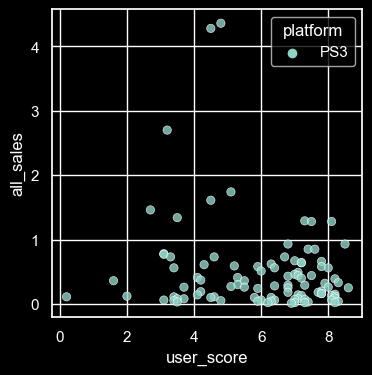

X360:


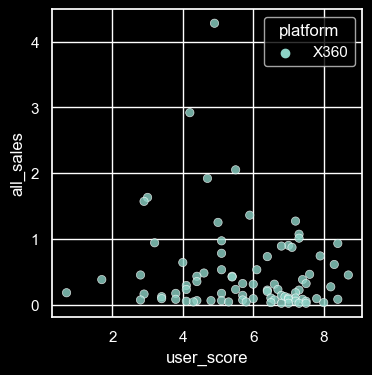

PC:


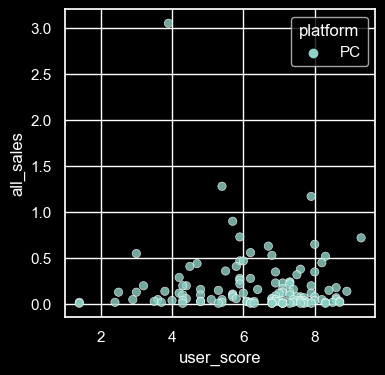

Wii:


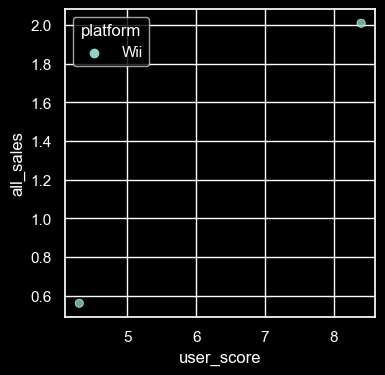

PSV:


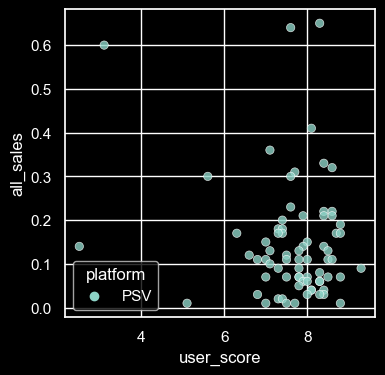

PSP:


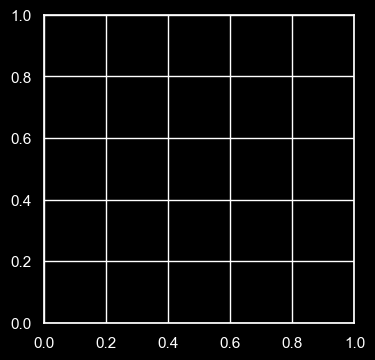

In [52]:
for name in platforms_unique:
    print(name+':')
    platform_q = df_act_q.query('platform == @name')
    sns.scatterplot(data=platform_q, x='user_score', y='all_sales', alpha = 0.8, hue='platform')
    plt.show()

зависимость продаж от оценки юзеров сложно установить
    
данные для Wii и PSP выведем отдельно:

In [53]:
df_act.query('platform == "Wii" | platform == "PSP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
850,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.00,0.17,NaN,8.4,E10+,2.01
2179,Just Dance 2016,Wii,2015,Misc,0.41,0.46,0.00,0.08,NaN,tbd,E10+,0.95
2180,Skylanders: Trap Team,Wii,2014,Action,0.41,0.46,0.00,0.08,NaN,tbd,E10+,0.95
3611,FIFA 15,Wii,2014,Sports,0.15,0.37,0.00,0.04,NaN,4.3,E,0.56
7991,How to Train Your Dragon 2,Wii,2014,Adventure,0.04,0.13,0.00,0.01,NaN,tbd,E10+,0.18
8009,Just Dance 2017,Wii,2016,Misc,0.06,0.11,0.00,0.01,NaN,tbd,E10+,0.18
8941,Skylanders: SuperChargers,Wii,2015,Action,0.02,0.12,0.00,0.01,NaN,NaN,NaN,0.15
11107,Pro Yaky? Spirits 2014,PSP,2014,Sports,0.00,0.00,0.09,0.00,NaN,NaN,NaN,0.09
11486,Uta no Prince-Sama: All Star After Secret,PSP,2015,Action,0.00,0.00,0.08,0.00,NaN,NaN,NaN,0.08
13451,Toukiden Kiwami,PSP,2014,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN,0.05


как видно, для этих платформ отсутствуют оценки

In [54]:
df_act

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [55]:
t=pd.DataFrame(df_act.groupby('genre')['name'].agg('count').reset_index().sort_values(by='name'))
t

,genre,name
5,Puzzle,14
11,Strategy,37
4,Platform,38
9,Simulation,44
2,Fighting,60
6,Racing,69
3,Misc,113
8,Shooter,128
10,Sports,161
1,Adventure,185


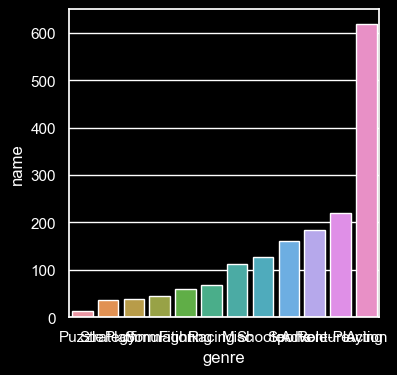

In [56]:
sns.barplot(data=t, x='genre', y='name')

sns.set(rc={'figure.figsize':(13,3)})

самый популярный жанр - Action
также популярные жанры - Role-Playing, Adventure, Sports, Shooter

In [57]:
t= df_act.groupby('genre')['all_sales'].agg(['median','mean', 'sum']).reset_index().sort_values(by='median')
t

,genre,median,mean,sum
1,Adventure,0.030,0.094865,17.55
5,Puzzle,0.045,0.157857,2.21
11,Strategy,0.060,0.107027,3.96
0,Action,0.090,0.322068,199.36
3,Misc,0.090,0.332301,37.55
6,Racing,0.090,0.398841,27.52
9,Simulation,0.100,0.298409,13.13
7,Role-Playing,0.110,0.459005,101.44
2,Fighting,0.125,0.470333,28.22
4,Platform,0.140,0.476053,18.09


для анализа использую данные медианных продаж, так как на них не влияют выбросы

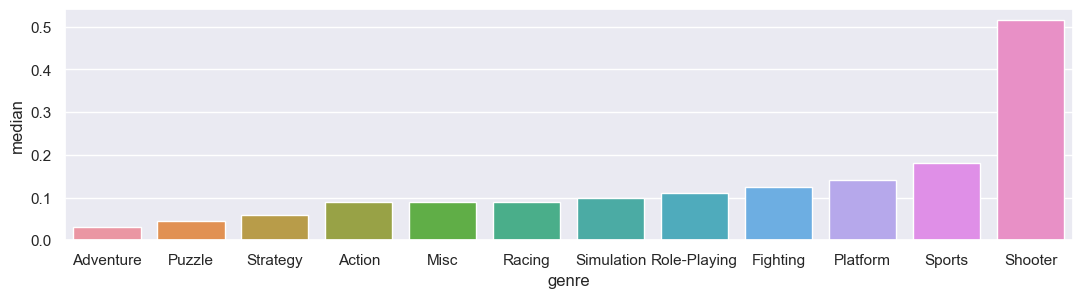

In [58]:
sns.barplot(data=t, x='genre', y='median')

sns.set(rc={'figure.figsize':(13,3)})

Shooter хоть и не самый популярный, но очень прибыльный согласно медианным продажам

также прибыльными являются жанры Sports, Platform, Fighting, Role-Playing

жанр Adventure популярный, но далеко не самый прибыльный

жанры Puzzle и Strategy самые непопулярные и приносят меньше всего прибыли

Составим портрет пользователя каждого региона

In [59]:
df_act_grouped=df_act.groupby('platform')['na_sales','eu_sales','jp_sales'].agg('sum')#.reset_index()
df_act_grouped

,na_sales,eu_sales,jp_sales
platform,,,
3DS,22.64,16.12,44.24
PC,7.23,17.97,0.00
PS3,22.05,25.54,11.22
PS4,98.61,130.04,15.02
PSP,0.00,0.00,0.36
PSV,2.52,3.53,14.54
Wii,2.08,2.59,0.00
WiiU,19.36,13.15,7.31
X360,28.30,15.49,0.08


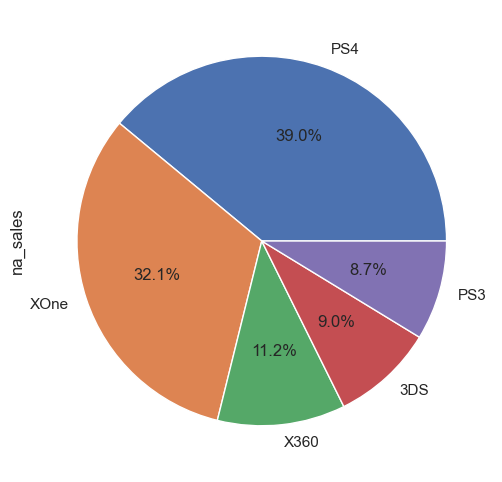

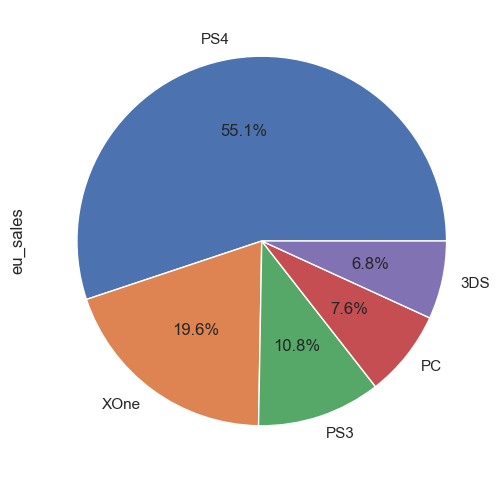

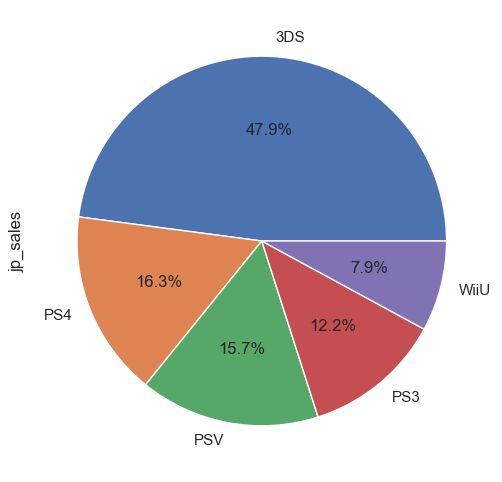

In [60]:
for name in df_act_grouped.columns:
    t=df_act_grouped.sort_values(by=name, ascending=False).head(5)
    t.plot.pie(y=name, legend=False, figsize=(6, 6), autopct='%1.1f%%')

Японские платформы популярны не только в Японии, но и в Северной Америке и Европе

- платформы PS4 и XOne самые популярные в Северной Америке
- в Европе ещё больше доля PS4 и меньше доля XOne
- платформа 3DS самая популярная в Японии занимает 48% рынка, остальную часть делят также японские производители

In [61]:
df_act_grouped=df_act.groupby('genre')['na_sales','eu_sales','jp_sales'].sum()
df_act_grouped

,na_sales,eu_sales,jp_sales
genre,,,
Action,72.53,74.68,29.58
Adventure,5.64,6.49,3.60
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Platform,6.79,6.80,2.69
Puzzle,0.65,0.52,0.93
Racing,8.74,14.13,1.76
Role-Playing,33.47,28.17,31.16
Shooter,79.02,65.52,4.87


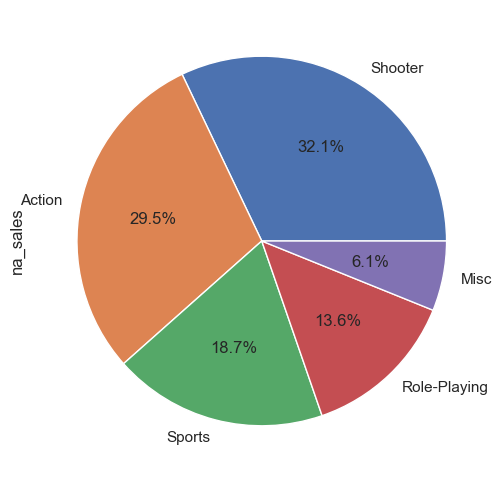

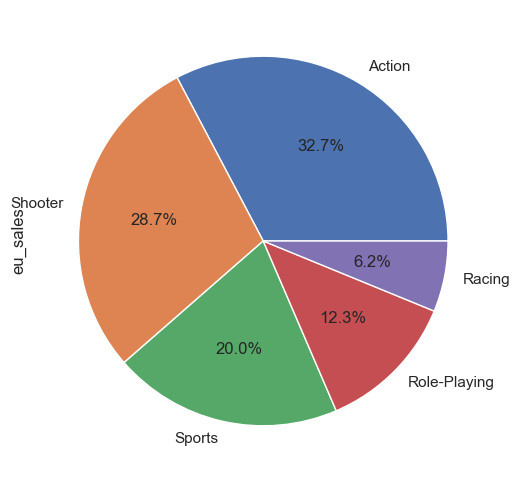

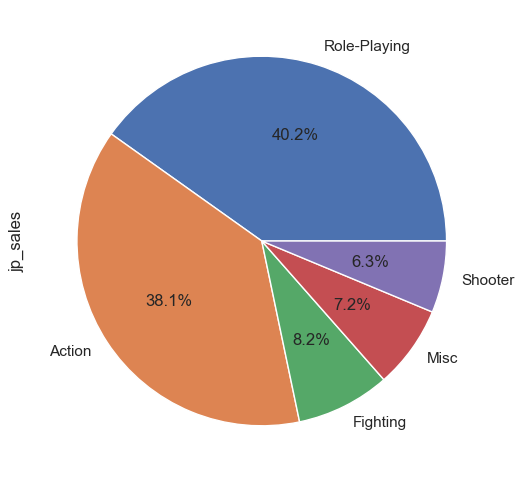

In [62]:
for name in df_act_grouped.columns:
    t=df_act_grouped.sort_values(by=name, ascending=False).head(5)
    t.plot.pie(y=name, legend=False, figsize=(6, 6), autopct='%1.1f%%')

Разница в жанрах практически отсутствует между NA и EU, самые популярные жанры это Shooter, Action, Sports и Role-Playing а вот в Японии самым популярным жанром является Role-Playing, это может быть связано с наличием собственных производителей игр, а также с национальными особенностями региона

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [63]:
df_act_grouped=df_act.groupby('rating', dropna=False)['na_sales','eu_sales','jp_sales'].sum()
df_act_grouped

,na_sales,eu_sales,jp_sales
rating,,,
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
M,96.42,93.44,8.01
T,38.95,34.07,14.78
NaN,64.72,58.95,56.90


na_sales:
rating
M       96.42
NaN     64.72
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64


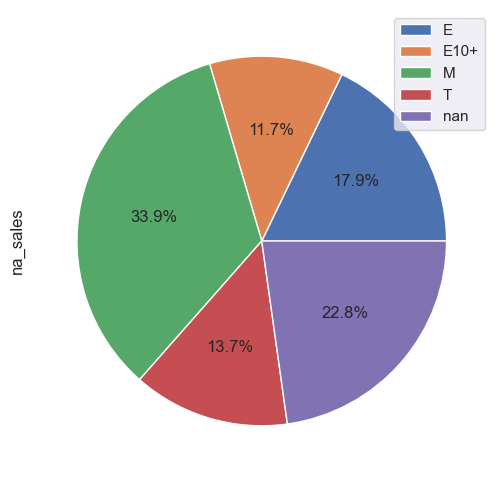

eu_sales:
rating
M       93.44
NaN     58.95
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64


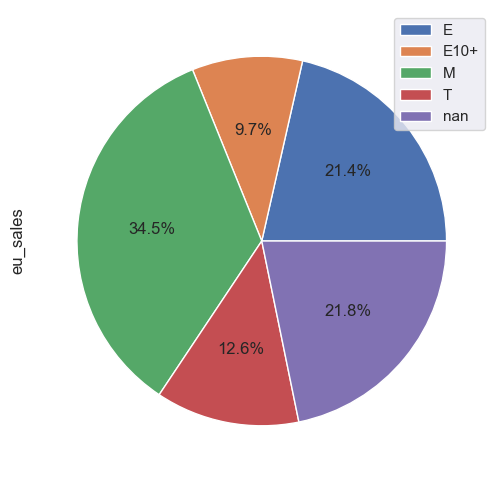

jp_sales:
rating
NaN     56.90
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64


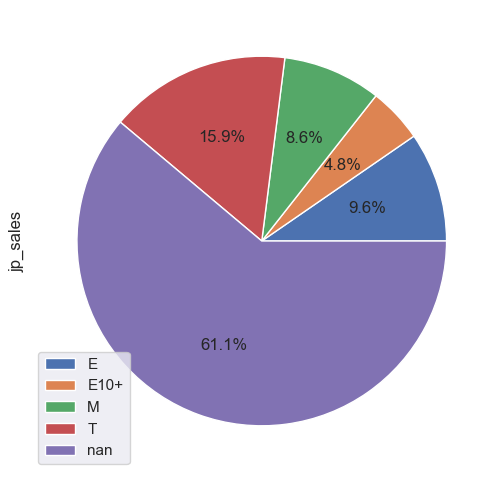

In [64]:
for name in df_act_grouped.columns:
    print(name+':')
    t=df_act_grouped.sort_values(by=name, ascending=False)
    print(t[name].head(5))
    df_act_grouped.plot.pie(y=name, labels=None, legend=True, figsize=(6, 6), autopct='%1.1f%%')
    plt.show()

Рейтинг ESRB практически одинаково влияет на продажи в Северной Америке и Европе, в Японии продажи с рейтингом Т выше, чем для категорий E и М. Продажи без категории лидируют в Японии и занимают второе место в Европе и Северной Америке

Проверим гипотезу:

H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

тогда 

H1: средние пользовательские рейтинги платформ Xbox One и PC разные

In [65]:
df_act_new = df_act[df_act['user_score'] != 'tbd'] # выкидываем значения tbd
df_act_new = df_act_new.dropna(axis=0, subset= ['user_score']) #отбрасываем нулевые значения в user_score
df_act_new['user_score'] = df_act_new['user_score'].astype(float) #меняем тип данных

df_act_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             888 non-null    object 
 1   platform         888 non-null    object 
 2   year_of_release  888 non-null    int64  
 3   genre            888 non-null    object 
 4   na_sales         888 non-null    float64
 5   eu_sales         888 non-null    float64
 6   jp_sales         888 non-null    float64
 7   other_sales      888 non-null    float64
 8   critic_score     704 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           852 non-null    object 
 11  all_sales        888 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 90.2+ KB


In [66]:
df_act_q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1596 non-null   object 
 1   platform         1596 non-null   object 
 2   year_of_release  1596 non-null   int64  
 3   genre            1596 non-null   object 
 4   na_sales         1596 non-null   float64
 5   eu_sales         1596 non-null   float64
 6   jp_sales         1596 non-null   float64
 7   other_sales      1596 non-null   float64
 8   critic_score     707 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           860 non-null    object 
 11  all_sales        1596 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 162.1+ KB


In [67]:
df_act_new['platform'].unique()

array(['PS4', 'WiiU', 'XOne', 'PS3', 'X360', '3DS', 'PC', 'Wii', 'PSV'],
      dtype=object)

In [68]:
xbox_one = df_act_new.query('platform == "XOne"')
pc = df_act_new.query('platform == "PC"')

In [69]:
sample_xbox_one = xbox_one['user_score']

In [70]:
sample_pc = pc['user_score']

In [71]:
alpha = 0.05 #задаем критический уровень стат.значимости

results = st.ttest_ind(sample_xbox_one, sample_pc, equal_var=False)

print('p-value:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Не отвергаем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим ещё одну гипотезу:

    
H0: средние пользовательские рейтинги жанров Action и Sports одинаковые

тогда 

H1: средние пользовательские рейтинги жанров Action и Sports разные

In [72]:
df_act_new['genre'].unique()

array(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing',
       'Platform', 'Simulation', 'Fighting', 'Misc', 'Adventure',
       'Puzzle', 'Strategy'], dtype=object)

In [73]:
action = df_act_new.query('genre == "Action"')
sample_action = action['user_score']

sports = df_act_new.query('genre == "Sports"')
sample_sports = sports['user_score']

In [74]:
alpha = .05

results = st.ttest_ind(sample_action, sample_sports, equal_var=False)

print('p-value:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые

## Общий вывод

#### Был дан массив данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах.
Целью работы было выполнить предобработку данных, исследовательский и статистический анализы данных, чтобы выявить определяющие успешность игры закономерности.


В ходе предобработки данных
- выполнена проверка на явные дубликаты
- были заменены названия столбцов
- выявлены пропуски данных в столбцах:
- в столбце year_of_release удалены пропуски и заменен тип данных на целочисленный
- подсчитаны и занесены в отдельный столбец суммарные продажи во всех регионах.

В результате исследовательского анализа данных выявлено:
- c 1994 начинается резкий рост выпуска игр, который продолжается до 2008 года, затем начинается падение
- цикл самых популярных платформ в среднем составляет 10 лет, за это время они появляются, выходят на пик продаж и исчезают
- за актуальный период (с 2014 по 2016 годы) платформа PS4 возглавляет рейтинг продаж
- за актуальный период среди популярных платформ рост продаж наблюдается только для платформ PS4 и XOne
- практически для всех платформ есть разбросы продаж по некоторым играм, достигающие десятков млн копий, медианные значения находятся в пределах 0.2 млн, а 3-й квартиль в пределах 0.8 млн
- между отзывами критиков и продажами прослеживается некоторая корреляция, чем популярнее платформа, тем сильнее эта корреляция
- между оценками юзеров и продажами корреляции не наблюдается, только для самой популярной платформы можно выделить положительную корреляцию этих параметров
- самый популярный жанр - Action также популярные жанры - Role-Playing, Adventure, Sports, Shooter
- Shooter хоть и не самый популярный, но очень прибыльный согласно медианным продажам, также прибыльными являются жанры Sports, Platform, Fighting, Role-Playing
- Японские платформы популярны не только в Японии, но и в Северной Америке и Европе
- разница в жанрах практически отсутствует между Северной Америкой и Европой, самые популярные жанры это Shooter, Action, Sports и Role-Playing а вот в Японии самым популярным жанром является Role-Playing, это может быть связано с наличием собственных производителей игр, а также с национальными особенностями региона
- рейтинг ESRB практически одинаково влияет на продажи в Северной Америке и Европе, в Японии продажи с рейтингом Т выше, чем для категорий E и М. Продажи без категории лидируют в Японии и занимают второе место в Европе и Северной Америке

Для проведения статистического анализа данных в столбце user_score были отброшены пропуски и значения 'tbd'.
В результате статистического анализа данных:
- не отвергнута гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- отвергнута гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые